In [1]:
import scipy.io as scio
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import math
import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import folium
from folium import plugins


# Data Cleaning

In [2]:
boston_crime = pd.read_csv('/Users/zjallenjiang/Desktop/CS_542_Project/crime.csv', encoding = 'gbk')
boston_crime_dataset = boston_crime.values.tolist()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in range(0, len(boston_crime_dataset)):
    val = boston_crime_dataset[i][6]
    if(val != val):
        boston_crime_dataset[i][6] = 'N'
print(len(boston_crime_dataset))

327820


In [4]:
boston_crime_df = pd.DataFrame(boston_crime_dataset)
boston_crime_df = boston_crime_df.dropna()
boston_crime_list = np.array(boston_crime_df).tolist()
print(len(boston_crime_list))
print(boston_crime_list[0])

304659
['I182080058', 2403, 'Disorderly Conduct', 'DISTURBING THE PEACE', 'E18', '495', 'N', '2018-10-03 20:13:00', 2018, 10, 'Wednesday', 20, 'Part Two', 'ARLINGTON ST', 42.26260773, -71.12118637, '(42.26260773, -71.12118637)']


In [5]:
boston_crime_list = [(offenseGroup, reportingArea, shooting, occurredDate, hour, day, month, year, street, lat, long) 
                     for (incidentNumber, offenseCode, offenseGroup, description, district, reportingArea, shooting, occurredDate,
                          year, month, day, hour, ucrPart, street, lat, long, latAndLong) in boston_crime_list]
print(boston_crime_list[0])

('Disorderly Conduct', '495', 'N', '2018-10-03 20:13:00', 20, 'Wednesday', 10, 2018, 'ARLINGTON ST', 42.26260773, -71.12118637)


In [6]:
boston_crime_df = pd.DataFrame(boston_crime_list)
boston_crime_df.columns = ['offenseGroup', 'reportingArea', 'shooting', 'occurredDate', 'hour', 'day', 'month', 'year', 'street', 'lat', 'long']

# Data Analysis

# Offense Group


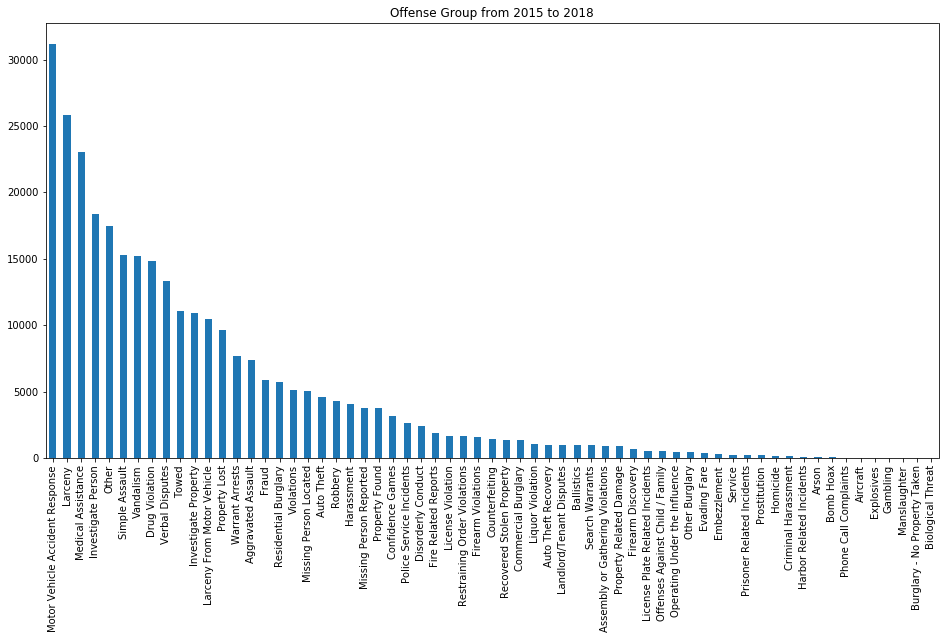

In [7]:
offense_group = boston_crime_df['offenseGroup'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].value_counts().plot.bar()
plt.title('Offense Group from 2015 to 2018')
plt.show()

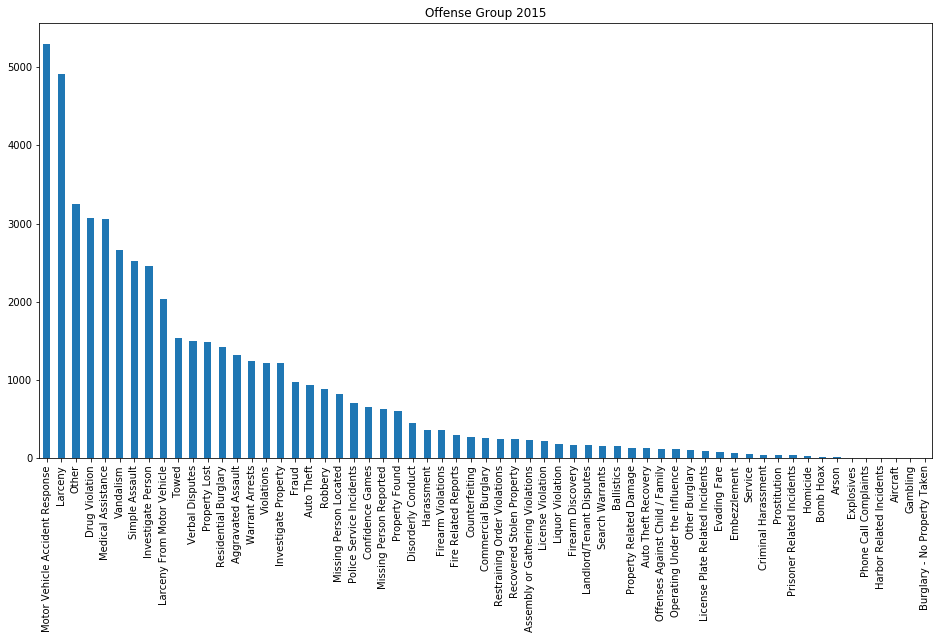

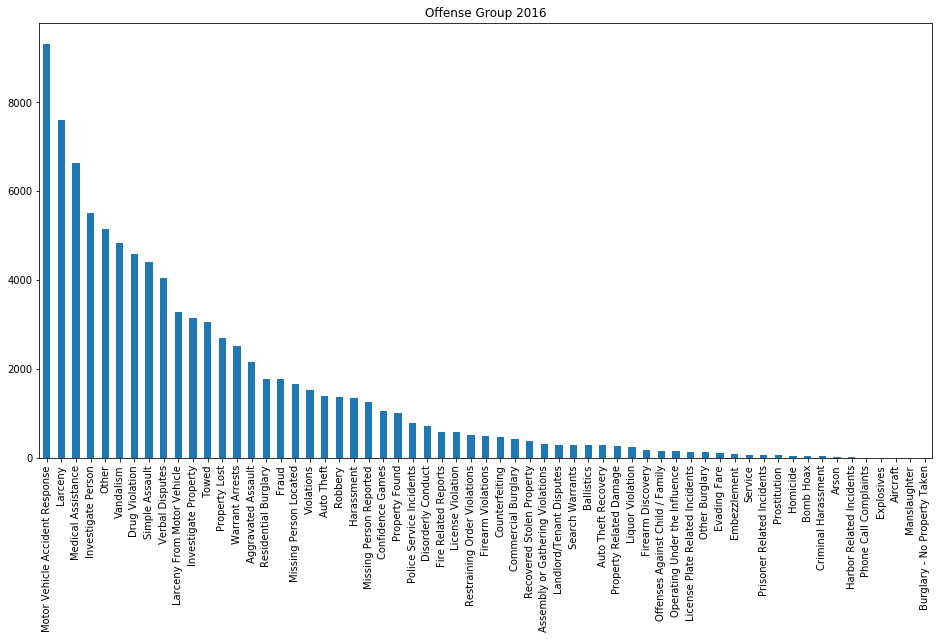

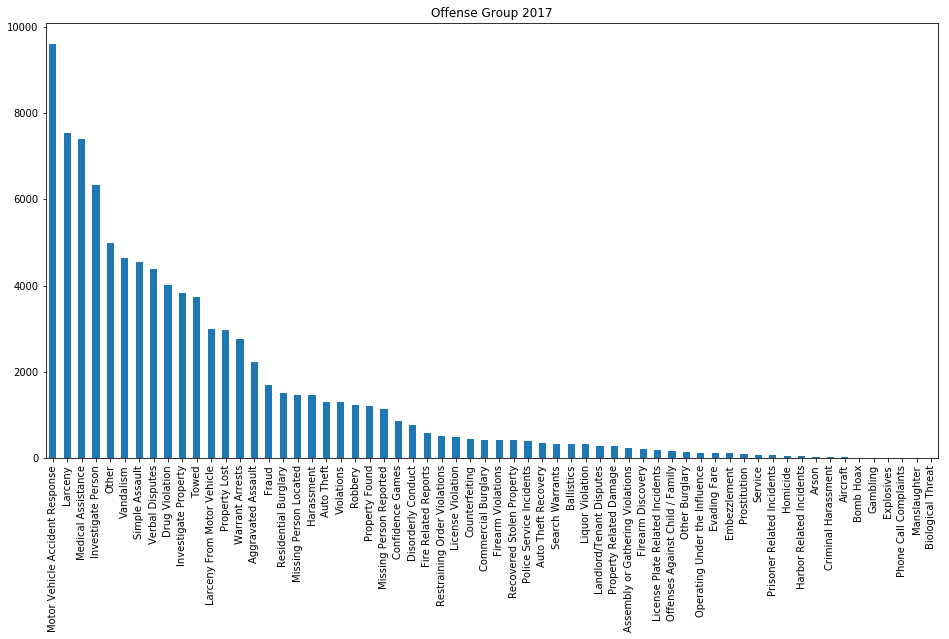

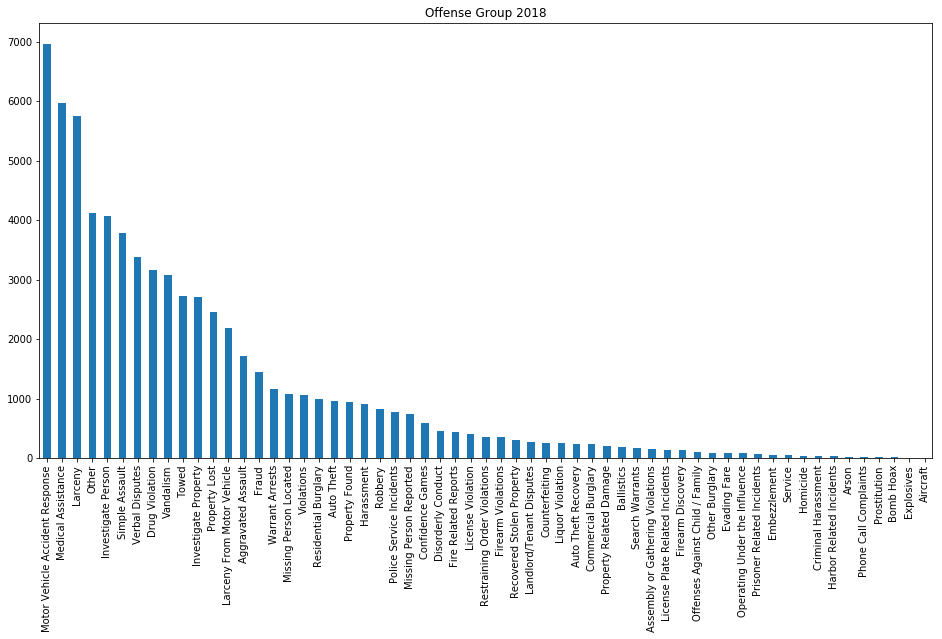

In [8]:
# 2015
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2015].value_counts().plot.bar()
plt.title('Offense Group 2015')
plt.show()

# 2016
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2016].value_counts().plot.bar()
plt.title('Offense Group 2016')
plt.show()

# 2017
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2017].value_counts().plot.bar()
plt.title('Offense Group 2017')
plt.show()

# 2018
plt.figure(figsize = (16,8))
boston_crime_df['offenseGroup'].loc[boston_crime_df['year'] == 2018].value_counts().plot.bar()
plt.title('Offense Group 2018')
plt.show()

# Shooting

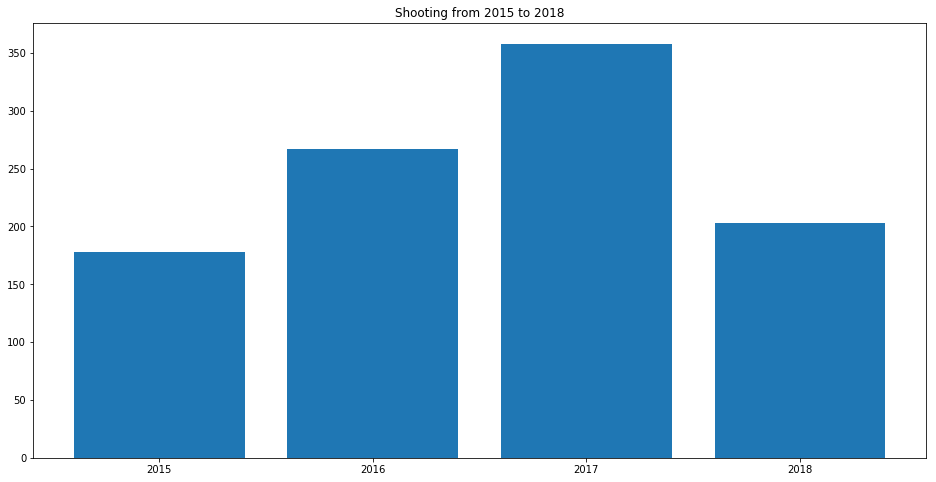

In [9]:
shooting = boston_crime_df['shooting'].unique()
shooting_Y = boston_crime_df.loc[boston_crime_df['shooting'] == 'Y']
shoot_2015 = len(shooting_Y.loc[shooting_Y['year'] == 2015])
shoot_2016 = len(shooting_Y.loc[shooting_Y['year'] == 2016])
shoot_2017 = len(shooting_Y.loc[shooting_Y['year'] == 2017])
shoot_2018 = len(shooting_Y.loc[shooting_Y['year'] == 2018])

shoot_year = '2015', '2016', '2017', '2018'
shoot_number = [shoot_2015, shoot_2016, shoot_2017, shoot_2018]

plt.figure(figsize = (16,8))
plt.bar(shoot_year, shoot_number)
plt.title('Shooting from 2015 to 2018')
plt.show()

# Hour

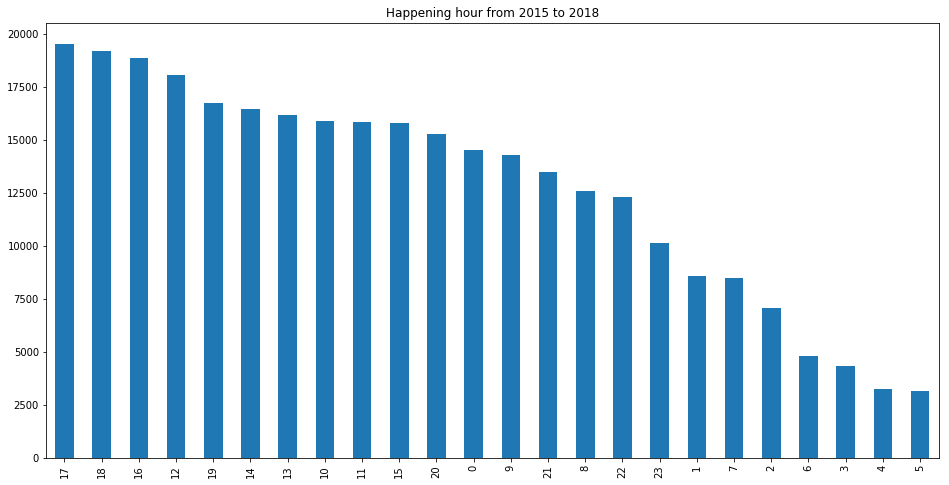

In [10]:
hour = boston_crime_df['hour'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['hour'].value_counts().plot.bar()
plt.title('Happening hour from 2015 to 2018')
plt.show()

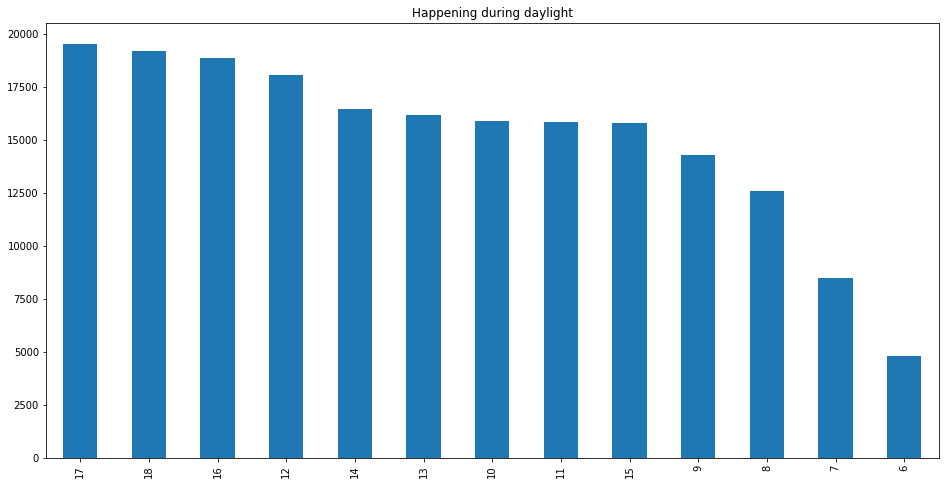

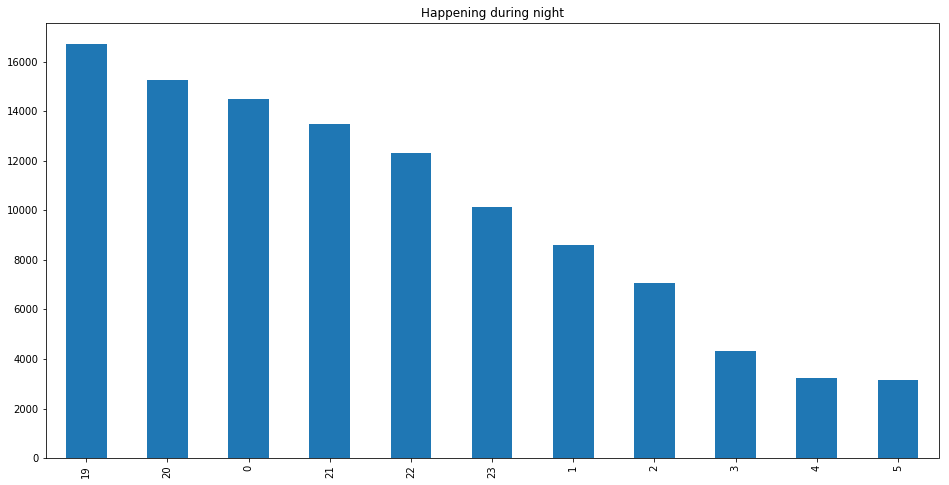

In [11]:
# daylight
plt.figure(figsize = (16,8))
crime_day = boston_crime_df['hour'].loc[(boston_crime_df['hour'] > 5) & (boston_crime_df['hour'] < 19)]
crime_day.value_counts().plot.bar()
plt.title('Happening during daylight')
plt.show()

# night
plt.figure(figsize = (16,8))
crime_day = boston_crime_df['hour'].loc[(boston_crime_df['hour'] < 6) | (boston_crime_df['hour'] > 18)]
crime_day.value_counts().plot.bar()
plt.title('Happening during night')
plt.show()

# Month

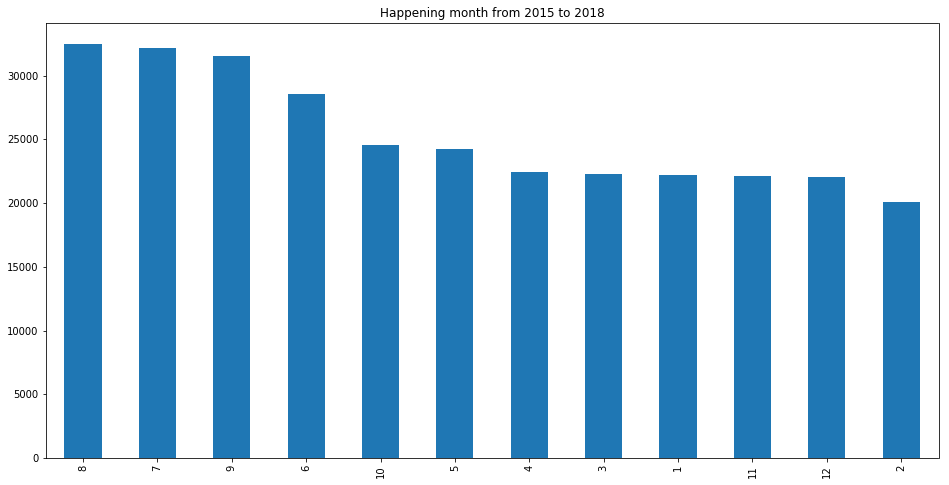

In [12]:
month = boston_crime_df['month'].unique()
plt.figure(figsize = (16,8))
boston_crime_df['month'].value_counts().plot.bar()
plt.title('Happening month from 2015 to 2018')
plt.show()

# Street

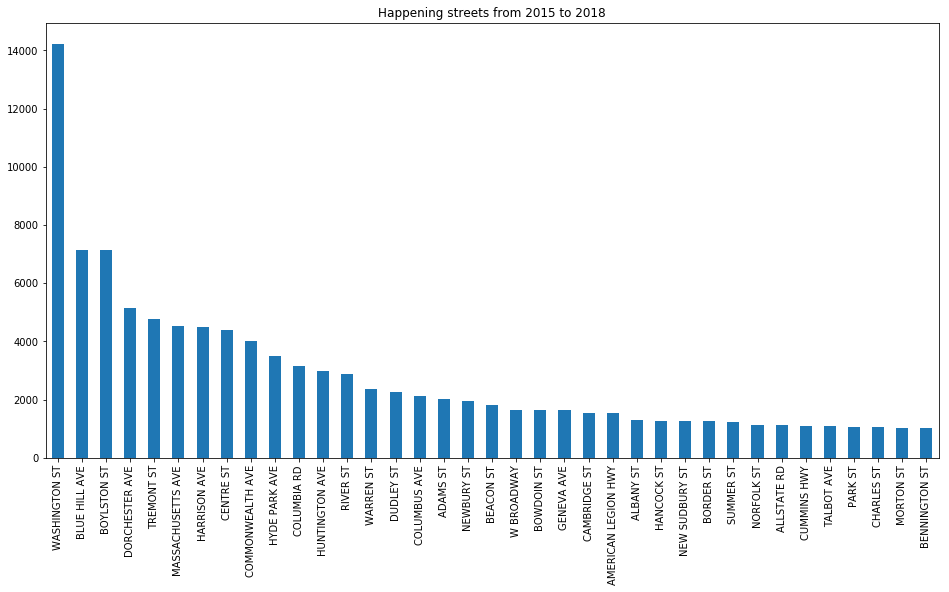

In [13]:
street = boston_crime_df['street'].unique()
plt.figure(figsize = (16,8))
count = boston_crime_df['street'].value_counts() 
count = count[count > 1000]
count.plot.bar()
plt.title('Happening streets from 2015 to 2018')
plt.show()

# Geographic place

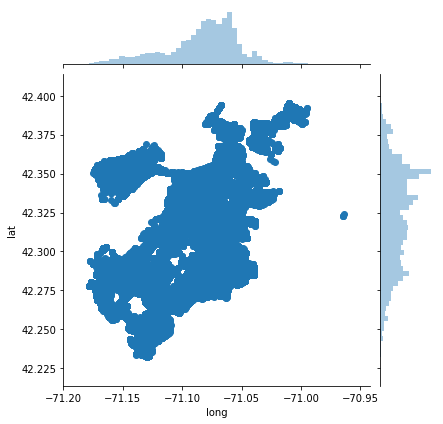

In [14]:
long_lat_df = boston_crime_df[['lat','long']]
long_lat_df = long_lat_df.loc[(long_lat_df['lat'] > 40) & (long_lat_df['long'] < -70)]
long_lat = sns.jointplot(x = long_lat_df['long'], y = long_lat_df['lat'], kind = 'scatter')

# Modeling

In [15]:
# Y - offenseGroup
# X - reportingArea, shooting, hour, day, month, year, latitude, longitude
boston_crime_df['offenseGroup'].value_counts().head(20)

Motor Vehicle Accident Response    31186
Larceny                            25808
Medical Assistance                 23041
Investigate Person                 18379
Other                              17508
Simple Assault                     15264
Vandalism                          15234
Drug Violation                     14829
Verbal Disputes                    13321
Towed                              11061
Investigate Property               10893
Larceny From Motor Vehicle         10490
Property Lost                       9629
Warrant Arrests                     7682
Aggravated Assault                  7406
Fraud                               5881
Residential Burglary                5696
Violations                          5103
Missing Person Located              5041
Auto Theft                          4598
Name: offenseGroup, dtype: int64

In [16]:
offenseGroup_list = ('Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance', 'Investigate Person',
                    'Other', 'Simple Assault', 'Vandalism', 'Drug Violation', 'Verbal Disputes', 'Towed',
                    'Investigate Property', 'Larceny From Motor Vehicle', 'Property Lost', 'Warrant Arrests',
                    'Aggravated Assault', 'Fraud', 'Residential Burglary', 'Violations', 'Missing Person Located',
                    'Auto Theft')
boston_crime_matrix = pd.DataFrame()
for i in range(0, len(offenseGroup_list)):
    boston_crime_matrix = boston_crime_matrix.append(boston_crime_df.loc[boston_crime_df['offenseGroup'] == offenseGroup_list[i]])
# X - reportingArea, shooting, hour, day, month, year, latitude, longitude
columns = ['reportingArea', 'shooting', 'hour', 'day', 'month', 'year', 'lat', 'long', 'offenseGroup']
boston_crime_matrix = boston_crime_matrix[columns]
boston_crime_matrix.fillna(0, inplace = True)

In [17]:
# reportingArea
boston_crime_matrix['reportingArea'] = pd.to_numeric(boston_crime_matrix['reportingArea'], errors='coerce')
boston_crime_matrix['reportingArea'].unique()

array([750., 234., 255., 773., 613., 822., 904., 520., 521., 395., 783.,
       381., 117., 450., 186.,  22., 472., 485., 378., 326., 463., 187.,
       333.,   1., 640., 612.,  76., 413., 165., 302., 189., 606., 593.,
       736., 466.,  26., 646., 113., 257., 768., 797., 796., 279., 309.,
       494., 377., 347., 177., 366., 110.,  77., 175., 284., 201., 789.,
       145., 146., 324., 911., 218., 476.,  81., 523., 765., 295., 330.,
       122., 334.,  97., 282., 793., 478., 564., 254., 369., 124., 537.,
       357., 263., 392., 270.,  83., 779., 795., 343., 906., 571., 236.,
       351., 498., 495., 296., 729., 759., 356., 384., 183., 634., 266.,
       664., 624., 237., 447., 622., 771., 239., 594., 147., 435., 642.,
       573., 388., 157., 199., 339.,  28., 939., 393., 322., 776., 285.,
       578., 340.,  48., 192., 803., 405., 490., 468., 345., 174., 206.,
       572., 112., 529.,  93., 532., 150., 691., 259., 173., 552., 615.,
       168., 426., 820.,  17.,  72., 362., 313., 65

In [18]:
# shooting
boston_crime_matrix['shooting'] = boston_crime_matrix['shooting'].map({
    'N' : 0,
    'Y' : 1
})
boston_crime_matrix['shooting'].unique()

array([0, 1])

In [19]:
# hour
boston_crime_matrix['hour'].unique()

array([19, 20, 15, 16, 14,  9, 17, 11, 22,  8,  7, 10,  0, 18, 23, 12,  6,
       13, 21,  5,  2,  4,  3,  1])

In [20]:
# day
boston_crime_matrix['day'] = boston_crime_matrix['day'].map({
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
})
boston_crime_matrix['day'].unique()

array([3, 2, 1, 7, 4, 5, 6])

In [21]:
# month
boston_crime_matrix['month'].unique()

array([10,  9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2])

In [22]:
# year
boston_crime_matrix['year'].unique()

array([2018, 2017, 2016, 2015])

In [23]:
# latitude, longitude
boston_crime_matrix[['lat', 'long']] = boston_crime_matrix[['lat', 'long']].dropna()
boston_crime_matrix[['lat', 'long']] = boston_crime_matrix[['lat', 'long']].loc[(boston_crime_matrix['lat'] > 40) & (boston_crime_matrix['long'] < -70)] 

boston_crime_matrix[['lat', 'long']].head(10)

,lat,long
9,42.344323,-71.157784
18,42.330015,-71.038513
60,42.310910,-71.057674
63,42.342592,-71.155817
68,42.339727,-71.108683
80,42.254699,-71.143553
90,42.330510,-71.080342
105,42.256028,-71.121907
141,42.254893,-71.124282
143,42.281872,-71.065383


In [24]:
X = boston_crime_matrix[['reportingArea', 'shooting', 'hour', 'day', 'month', 'year', 'lat', 'long']]
Y = boston_crime_matrix['offenseGroup']
Y = Y.map({
    'Motor Vehicle Accident Response' : 1,
    'Larceny' : 2, 
    'Medical Assistance' : 3,
    'Investigate Person' : 4, 
    'Other' : 5,
    'Simple Assault' : 6,
    'Vandalism' : 7,
    'Drug Violation' : 8,
    'Verbal Disputes' : 9, 
    'Towed' : 10,                            
    'Investigate Property' : 11, 
    'Larceny From Motor Vehicle' : 12,
    'Property Lost' : 13,
    'Warrant Arrests' : 14,
    'Aggravated Assault' : 15,
    'Fraud' : 16,
    'Residential Burglary' : 17,
    'Violations' : 18,
    'Missing Person Located' : 19,
    'Auto Theft' : 20                   
})
Y.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y, 
    test_size = 0.2,
    random_state = 42
)

X_train = X_train.fillna(X_train.mean())
Y_train = Y_train.fillna(Y_train.mean())
X_test = X_test.fillna(X_train.mean())
Y_test = Y_test.fillna(Y_test.mean())

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(206440, 8) (206440,)
(51610, 8) (51610,)


In [26]:
X_train

,reportingArea,shooting,hour,day,month,year,lat,long
199132,618.0,0,8,7,8,2016,42.342279,-71.091522
265528,336.0,0,1,5,11,2015,42.305197,-71.068368
130047,342.0,0,16,3,4,2017,42.303419,-71.069557
169446,216.0,0,15,5,12,2016,42.332659,-71.051416
255577,149.0,0,12,1,11,2015,42.345979,-71.076712
211981,270.0,0,12,5,6,2016,42.333951,-71.075389
40473,209.0,0,18,1,4,2018,42.338349,-71.044958
133581,256.0,0,0,6,4,2017,42.317794,-71.042110
289916,499.0,0,13,2,8,2015,42.277750,-71.119389
276682,478.0,0,16,3,9,2015,42.268229,-71.105525


## Linear Regression

In [27]:
linearRegression = LinearRegression()
linearRegression = linearRegression.fit(X_train, Y_train)
Y_pred = linearRegression.predict(X_test)
# Y_test = Y_test.values
mse = mean_squared_error(Y_test, Y_pred, multioutput = 'uniform_average')
print(mse)
print(linearRegression.intercept_)
print(linearRegression.coef_)

28.276453190229002
884.2292317620437
[ 4.86244634e-04  5.98291220e+00 -2.21972385e-02 -1.55471294e-02
 -1.54829594e-02 -1.26706544e-01 -5.31901551e+00  5.56975575e+00]


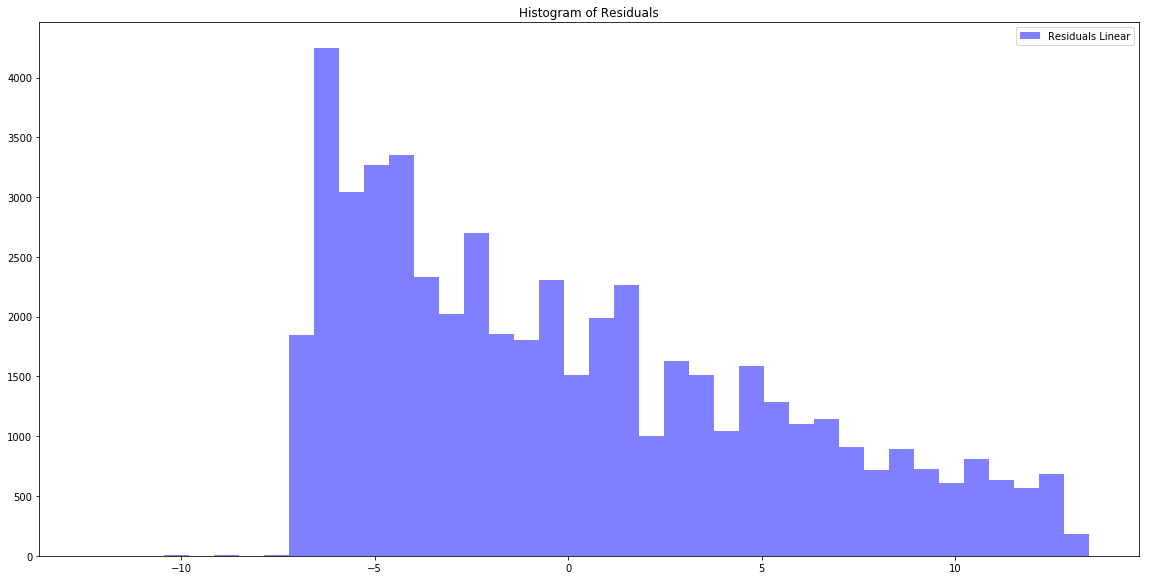

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(16, 8))
f.tight_layout()
ax.hist(Y_test - Y_pred,bins=40, label='Residuals Linear', color='b', alpha=.5);
ax.set_title("Histogram of Residuals")
ax.legend(loc='best');

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


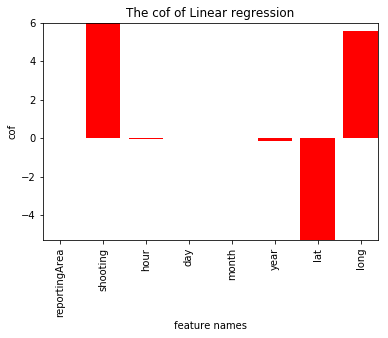

<Figure size 1152x576 with 0 Axes>

In [29]:
X_test.feature_names = ['reportingArea', 'shooting', 'hour', 'day', 'month', 'year', 'lat', 'long']
list(zip(X_test.feature_names, linearRegression.coef_))
def plotCofBar(x_feature,y_cof):
    x_value = range(len(x_feature))
    plt.bar(x_value, y_cof, alpha = 1, color = 'r', align="center")
    plt.autoscale(tight=True)
    plt.xticks([i for i in range(len(x_feature))],x_feature,rotation="90")
    plt.xlabel("feature names")
    plt.ylabel("cof")
    plt.title("The cof of Linear regression")
    plt.figure(figsize = (16,8))
    plt.show()

plotCofBar(X_test.feature_names, linearRegression.coef_)

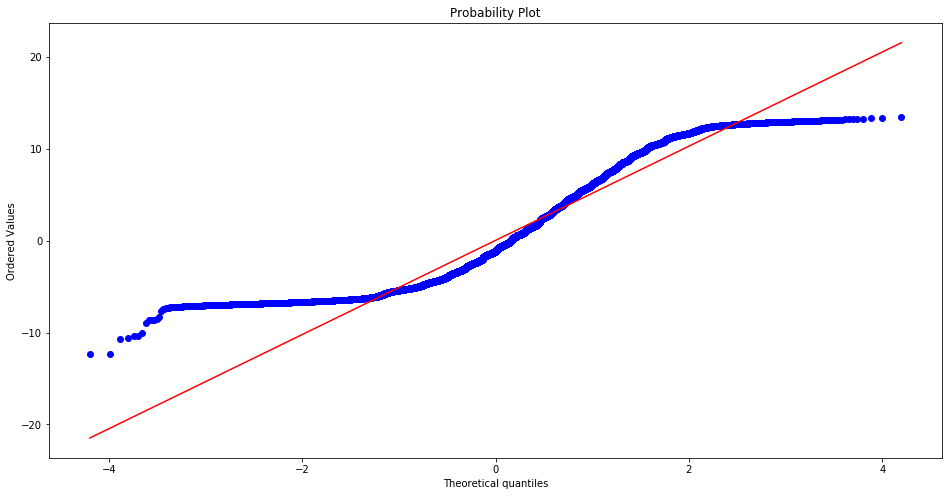

In [30]:
from scipy.stats import probplot
f = plt.figure(figsize=(16, 8))
ax = f.add_subplot(111)
probplot(Y_test - Y_pred, plot=ax);

## Naive Bayes Classification - GaussianNB

In [31]:
gauss = GaussianNB()
gauss = gauss.fit(X_train, Y_train)

gauss_pred = gauss.predict(X_test)

gauss_score = precision_recall_fscore_support(Y_test, gauss_pred, average=None)
print(gauss_score)

(array([0.13585746, 0.12319062, 0.2       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09147626, 0.        ,
       0.        , 0.25      , 0.        , 0.        , 0.71612903,
       0.        , 0.06729758, 0.        , 0.        , 0.        ]), array([1.18927701e-01, 7.85130401e-01, 2.16919740e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.15837937e-01, 0.00000000e+00, 0.00000000e+00, 4.75285171e-04,
       0.00000000e+00, 0.00000000e+00, 7.41482966e-02, 0.00000000e+00,
       5.72450805e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([0.12683011, 0.2129659 , 0.00043337, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14996347, 0.        ,
       0.        , 0.00094877, 0.        , 0.        , 0.13438257,
       0.        , 0.06186564, 0.        , 0.        , 0.        ]), array([6155, 5138, 4610, 3566, 3545, 3100, 3015, 2886, 2715, 2261, 2164,
       2104, 2007, 1510, 1497

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print(gauss.score(X_test, Y_test))


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

print('Accuracy：\t', accuracy_score(Y_test, gauss_pred))
precision = precision_score(Y_test, gauss_pred, average = 'weighted')
print('Precision:\t', precision)
recall = recall_score(Y_test, gauss_pred, average = 'weighted')
print('Recall:  \t', recall)
print('f1 score: \t', f1_score(Y_test, gauss_pred, average = 'weighted'))
print(2 * (precision * recall) / (precision + recall))

0.11765161790350707
Accuracy：	 0.11765161790350707
Precision:	 0.0835651612980334
Recall:  	 0.11765161790350707
f1 score: 	 0.04953186338526498
0.09772123841852942


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes Classification - BernoulliNB

In [33]:
bernoulli = BernoulliNB()
bernoulli = bernoulli.fit(X_train, Y_train)

bernoulli_pred = bernoulli.predict(X_test)

bernoulli_score = precision_recall_fscore_support(Y_test, bernoulli_pred, average=None)
print(bernoulli_score)

(array([0.11958022, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.71612903,
       0.        , 0.        , 0.        , 0.        , 0.        ]), array([0.99967506, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0741483 ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), array([0.21360875, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13438257,
       0.        , 0.        , 0.        , 0.        , 0.        ]), array([6155, 5138, 4610, 3566, 3545, 3100, 3015, 2886, 2715, 2261, 2164,
       2104, 2007, 1510, 1497, 1198, 1118, 1009, 1063,  949]))


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
print('Accuracy：\t', accuracy_score(Y_test, bernoulli_pred))
precision = precision_score(Y_test, bernoulli_pred, average = 'weighted')
print('Precision:\t', precision)
recall = recall_score(Y_test, bernoulli_pred, average = 'weighted')
print('Recall:  \t', recall)
print('f1 score: \t', f1_score(Y_test, bernoulli_pred, average = 'weighted'))
print(2 * (precision * recall) / (precision + recall))

Accuracy：	 0.12137182716527804
Precision:	 0.035033160028330984


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Recall:  	 0.12137182716527804
f1 score: 	 0.029372845360991204
0.05437216191512672


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machine

In [35]:
# startTime = datetime.datetime.now()
# lin_clf = LinearSVC()
# lin_clf.fit(X_train, Y_train) 
# dec = lin_clf.decision_function([[1]])
# print(dec)
# endTime = datetime.datetime.now()
# print(endTime - startTime)

## KNeighborsClassifier

In [36]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train) 

neigh_pred = neigh.predict(X_test)

neigh_score = precision_recall_fscore_support(Y_test, neigh_pred, average=None)
print(neigh_score)

(array([0.15235735, 0.20577094, 0.13029209, 0.09755387, 0.11042312,
       0.10509554, 0.08961997, 0.31296572, 0.11232544, 0.29207634,
       0.22054665, 0.11721612, 0.08482871, 0.09448819, 0.08920188,
       0.06130268, 0.07615894, 0.07035176, 0.15634218, 0.05555556]), array([0.3696182 , 0.3594784 , 0.17223427, 0.09394279, 0.09055007,
       0.06387097, 0.05240464, 0.36382536, 0.06813996, 0.2233525 ,
       0.10813309, 0.04562738, 0.02590932, 0.03178808, 0.0253841 ,
       0.01335559, 0.02057245, 0.02775025, 0.04985889, 0.00948367]), array([0.21577275, 0.26172595, 0.14835575, 0.09571429, 0.09950403,
       0.07945425, 0.06613646, 0.33648454, 0.08482348, 0.25313283,
       0.14511628, 0.06568594, 0.03969466, 0.04757185, 0.03952158,
       0.02193283, 0.03239437, 0.039801  , 0.07560628, 0.01620162]), array([6155, 5138, 4610, 3566, 3545, 3100, 3015, 2886, 2715, 2261, 2164,
       2104, 2007, 1510, 1497, 1198, 1118, 1009, 1063,  949]))


In [37]:
print('Accuracy：\t', accuracy_score(Y_test, neigh_pred))
precision = precision_score(Y_test, neigh_pred, average = 'weighted')
print('Precision:\t', precision)
recall = recall_score(Y_test, neigh_pred, average = 'weighted')
print('Recall:  \t', recall)
print('f1 score: \t', f1_score(Y_test, neigh_pred, average = 'weighted'))
print(2 * (precision * recall) / (precision + recall))

Accuracy：	 0.16014338306529743
Precision:	 0.14373932036792553
Recall:  	 0.16014338306529743
f1 score: 	 0.13818130160162093
0.15149859326089957


## KMeans

In [38]:
KMeans_loc = boston_crime_matrix[['lat', 'long']]
KMeans_loc = KMeans_loc.dropna()
KMeans_loc = KMeans_loc.loc[(KMeans_loc['lat'] > 40) & (KMeans_loc['long'] < -70)]

X = KMeans_loc

In [39]:
def Kmeans_cluster(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [40]:
clust_labels, cent = Kmeans_cluster(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

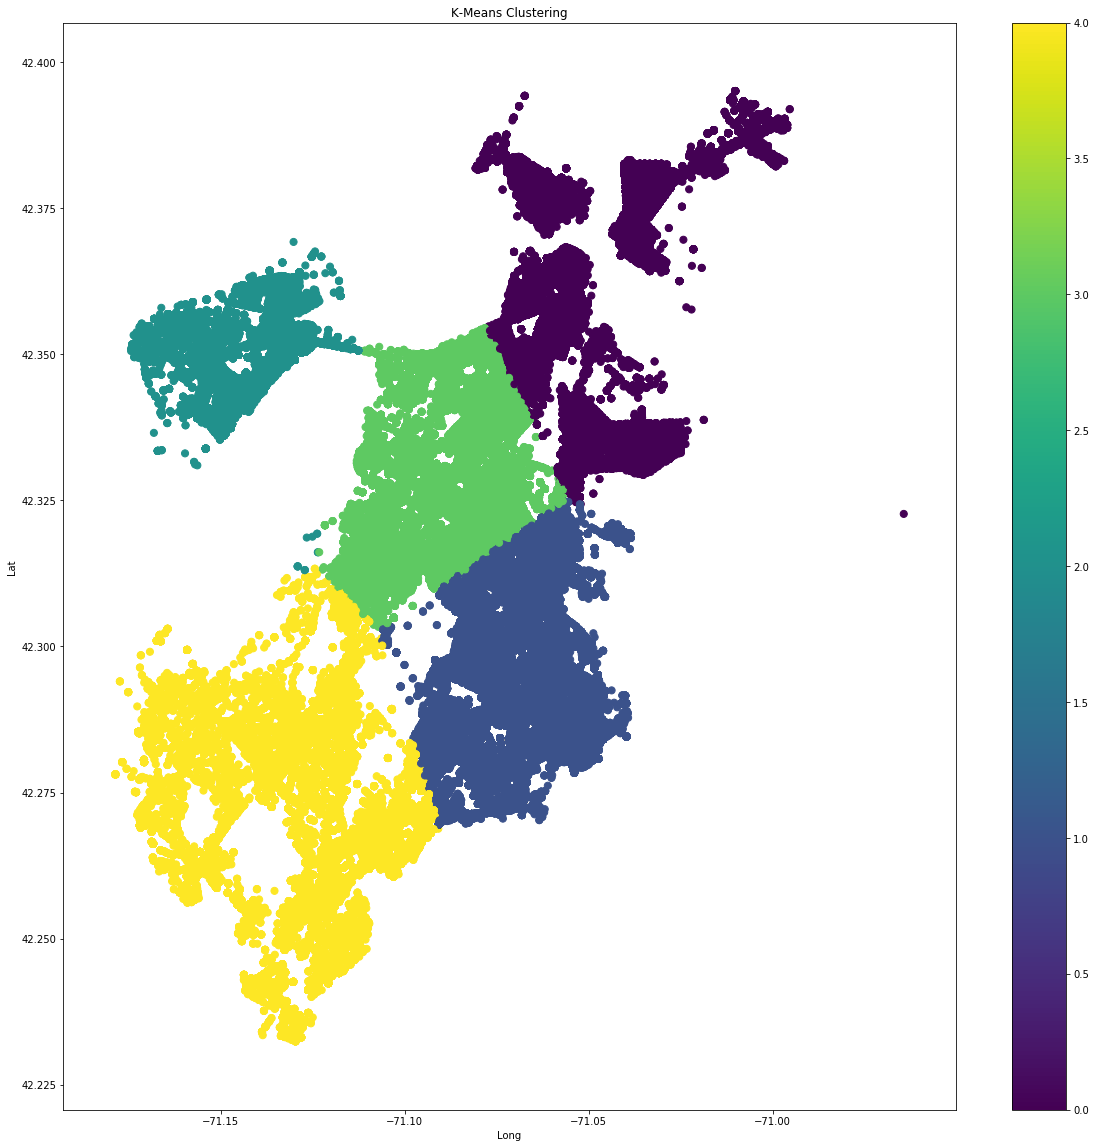

In [41]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['long'],X['lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

In [42]:
KMeans_loc = boston_crime_matrix[['lat', 'long']]
KMeans_loc = KMeans_loc.dropna()
KMeans_loc = KMeans_loc.loc[(KMeans_loc['lat'] > 40) & (KMeans_loc['long'] < -70)]

X = KMeans_loc
clust_labels, cent = Kmeans_cluster(X, 34)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

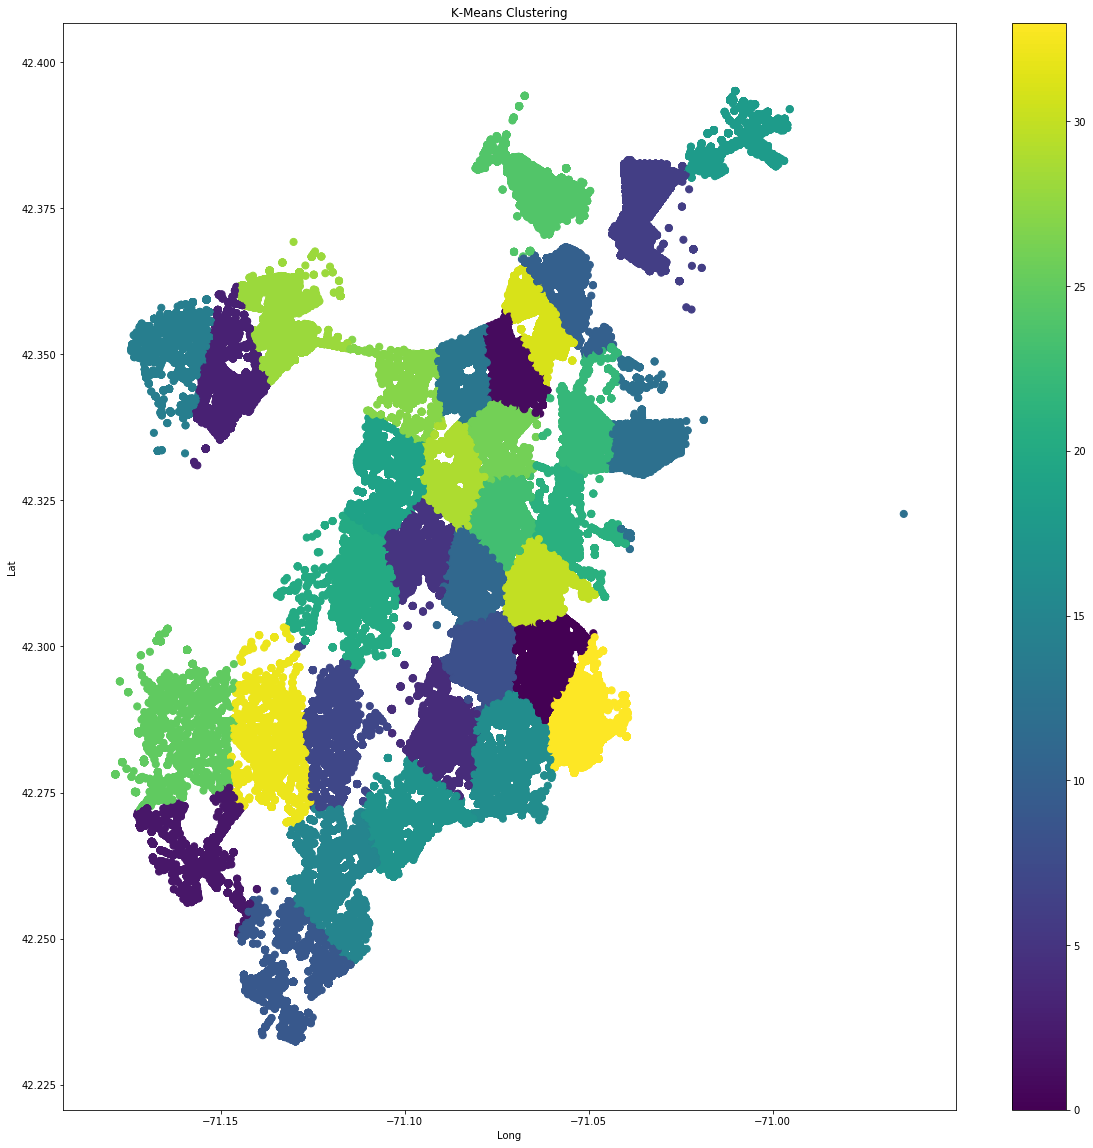

In [43]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['long'],X['lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

# Folium

In [44]:
boston_crime_matrix = boston_crime_matrix.loc[(boston_crime_matrix['shooting'] == 1)]
KMeans_loc = boston_crime_matrix[['lat', 'long']]
KMeans_loc = KMeans_loc.dropna()
KMeans_loc = KMeans_loc.loc[(KMeans_loc['lat'] > 40) & (KMeans_loc['long'] < -70)]
X = KMeans_loc

crime_map = folium.Map(location=[X['lat'].mean(), X['long'].mean()], zoom_start=10)
marker_cluster = plugins.MarkerCluster().add_to(crime_map)
for name,row in X.iterrows():
     folium.Marker([row["lat"], row["long"]], popup="{0}:{1}".format(row["lat"], row["long"])).add_to(marker_cluster)     

In [45]:
display(crime_map)

In [46]:
crime_map.save('crime_map.html')